In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Data Training-1.csv")
data.head()

,Periode,Bulan,Tidak/belum pernah sekolah,Tidak/belum tamat SD,SD,SLTP,SLTA Umum/SMU,SLTA Kejuruan/SMK,Akademi/Diploma,Universitas,Total
0,2006,Februari,234465,614960,2675459,2860007,2842876,1204140,297185,375601,11104693
1,2006,Agustus,170666,611254,2589699,2730045,2851518,1305190,278074,395554,10932000
2,2007,Februari,145750,520316,2753548,2643062,2630360,1114675,330316,409890,10547917
3,2007,Agustus,94301,438519,2179792,2264198,2532204,1538349,397191,566588,10011142
4,2008,Februari,79764,448431,2216748,2166619,2204377,1165582,519867,626202,9427590


In [38]:
data.info()
data.describe()
data.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Periode                     35 non-null     int64 
 1   Bulan                       35 non-null     object
 2   Tidak/belum pernah sekolah  35 non-null     int64 
 3   Tidak/belum tamat SD        35 non-null     int64 
 4   SD                          35 non-null     int64 
 5   SLTP                        35 non-null     int64 
 6   SLTA Umum/SMU               35 non-null     int64 
 7   SLTA Kejuruan/SMK           35 non-null     int64 
 8   Akademi/Diploma             35 non-null     int64 
 9   Universitas                 35 non-null     int64 
 10  Total                       35 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.1+ KB


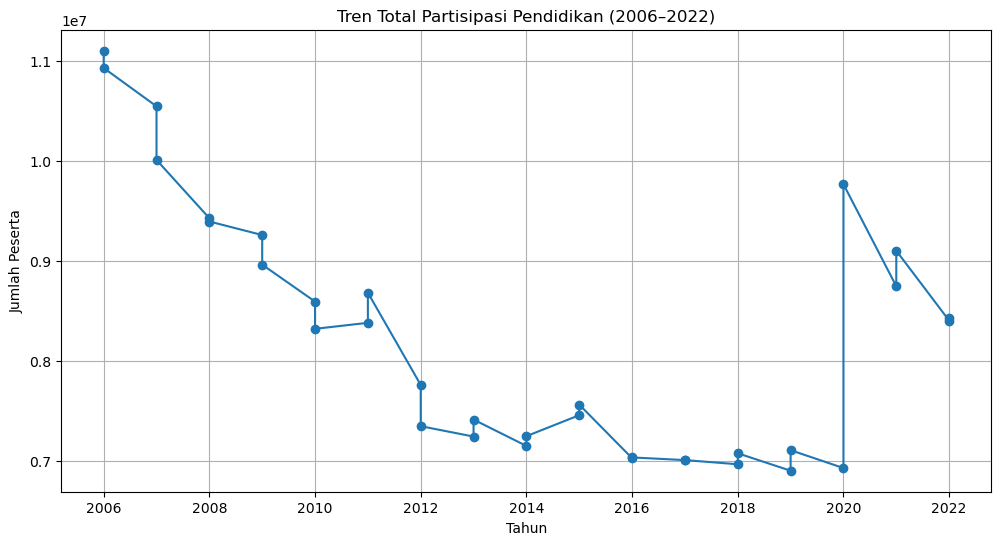

In [40]:
#tren total partisipasi pendidikan tahun 2006-2002
plt.figure(figsize=(12, 6))
plt.plot(data['Periode'], data['Total'], marker='o')
plt.title("Tren Total Partisipasi Pendidikan (2006–2022)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Peserta")
plt.grid()
plt.show()

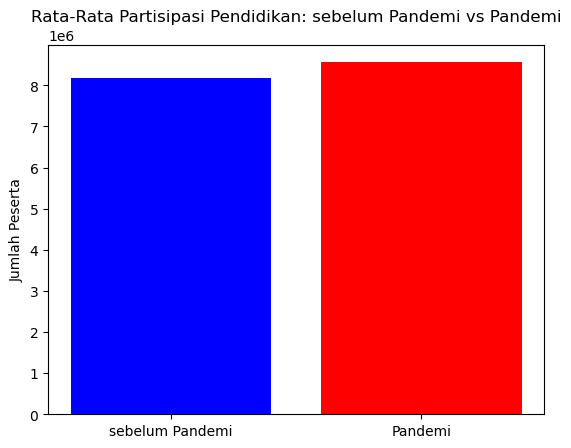

In [50]:
sebelum_pandemic = data[data['Periode'] < 2020]['Total'].mean()
pandemic = data[data['Periode'] >= 2020]['Total'].mean()

plt.bar(['sebelum Pandemi', 'Pandemi'], [sebelum_pandemic, pandemic], color=['blue', 'red'])
plt.title("Rata-Rata Partisipasi Pendidikan: sebelum Pandemi vs Pandemi")
plt.ylabel("Jumlah Peserta")
plt.show()

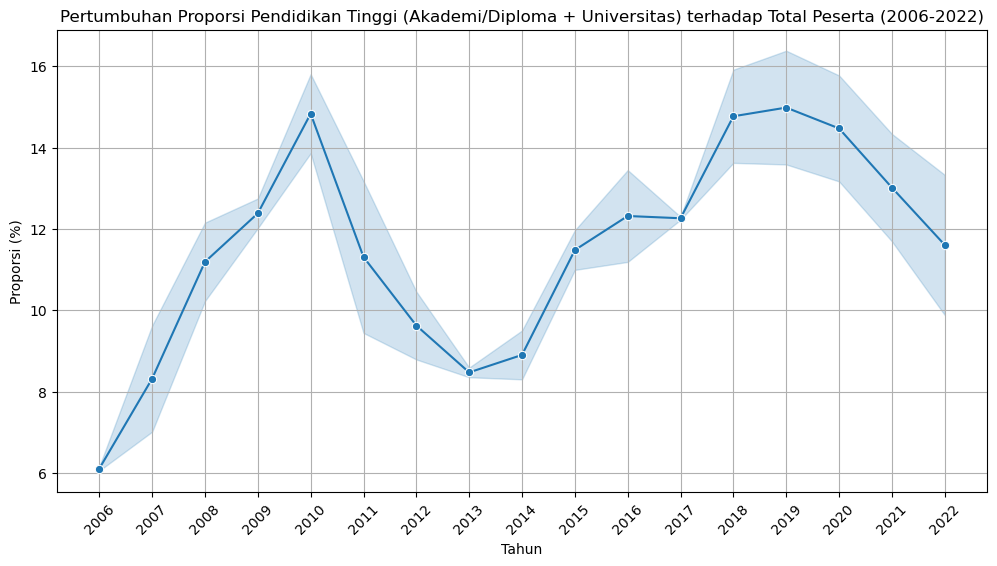

In [48]:
# Hitung proporsi pendidikan tinggi per tahun
data['Proporsi_Pendidikan_Tinggi'] = (data['Akademi/Diploma'] + data['Universitas']) / data['Total'] * 100

plt.figure(figsize=(12, 6))
sns.lineplot(x='Periode', y='Proporsi_Pendidikan_Tinggi', data=data, marker='o')
plt.title("Pertumbuhan Proporsi Pendidikan Tinggi (Akademi/Diploma + Universitas) terhadap Total Peserta (2006-2022)")
plt.xlabel("Tahun")
plt.ylabel("Proporsi (%)")
plt.grid()
plt.xticks(data['Periode'].unique(), rotation=45)
plt.show()

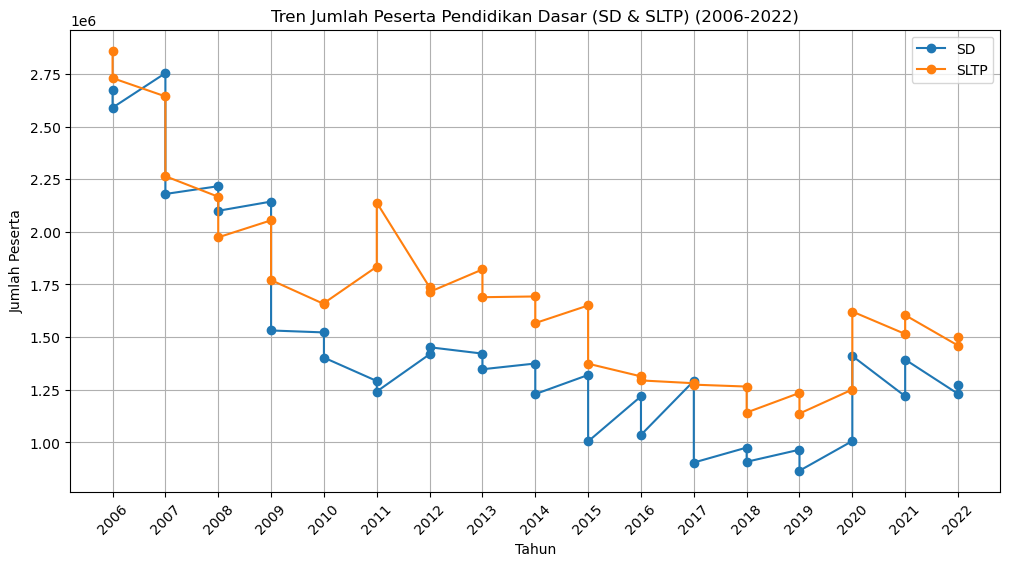

Penurunan jumlah peserta SD dari 2006 ke 2022: 52.38%


In [46]:
# Hitung total SD + SLTP per tahun
data['Total_Dasar'] = data['SD'] + data['SLTP']

# Plot tren
plt.figure(figsize=(12, 6))
plt.plot(data['Periode'], data['SD'], label='SD', marker='o')
plt.plot(data['Periode'], data['SLTP'], label='SLTP', marker='o')
plt.title("Tren Jumlah Peserta Pendidikan Dasar (SD & SLTP) (2006-2022)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Peserta")
plt.legend()
plt.grid()
plt.xticks(data['Periode'].unique(), rotation=45)
plt.show()

# Hitung persentase penurunan SD dari 2006 ke 2022
penurunan_SD = ((data['SD'].iloc[0] - data['SD'].iloc[-1]) / data['SD'].iloc[0]) * 100
print(f"Penurunan jumlah peserta SD dari 2006 ke 2022: {penurunan_SD:.2f}%")